# 01 - Tutorial

In this notebook you can find example code to retrieve stock information and visualize it.

In [1]:
import sys
sys.path.insert(0, '../')
%reload_ext autoreload
%autoreload 2
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Start server

The `Server` class is the interface to perform HTTPS requests to acquire data regarding instruments, like stocks.

In [2]:
import time

import seaborn as sns
from matplotlib import pyplot as plt

from modules.server import Server

In [3]:
srv = Server()
srv.start()

Once started, we can request information on any stock we want simply by accesing items in `srv`. These will be cached, so only the first access will have significant delay.

In [4]:
# request stock and time performance
start_t = time.perf_counter()
stock = srv['SPY']
stop_t = time.perf_counter()

print(f'Retrieved: {stock}')
print(f'Requesting stock took {stop_t - start_t:.4f}s')

Retrieved: Stock("SPY", conid=756733)
Requesting stock took 0.7851s


In [5]:
%%timeit
srv['SPY']

2.33 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


We can print and visualize the historical of the stock,

In [6]:
stock.hist

,open,close,high,low,volume
date,,,,,
2021-07-15 13:30:00,434.81,435.35,435.42,433.98,55540
2021-07-15 14:00:00,435.36,434.78,435.53,434.18,72167
2021-07-15 15:00:00,434.78,434.74,435.36,434.20,47828
2021-07-15 16:00:00,434.73,434.56,434.96,434.01,41819
2021-07-15 17:00:00,434.56,432.79,434.60,432.72,69164
...,...,...,...,...,...
2021-08-13 15:00:00,445.45,445.52,445.69,445.35,21512
2021-08-13 16:00:00,445.52,445.55,445.62,445.36,18205
2021-08-13 17:00:00,445.55,445.73,445.80,445.40,19141


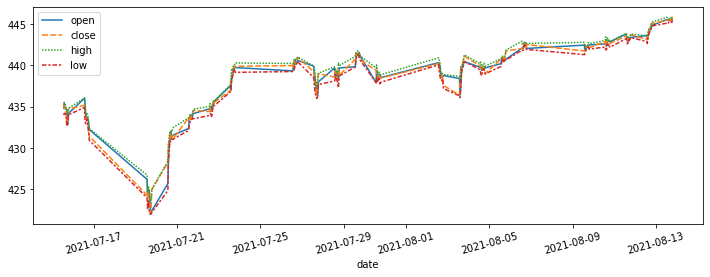

In [7]:
y = ['open', 'close', 'high', 'low']
plt.figure(figsize=(12, 4))
sns.lineplot(data=stock.hist[y])
plt.xticks(rotation=15)
plt.show()

## Different time intervals

We can specify the period and bar (time step) to get different time intervals and resolutions on the stock's value.

In [8]:
period = '5y'
bar = '1d'
stock = srv['SPY', period, bar]
print('Number of data points: ', len(stock.hist))

Number of data points:  999


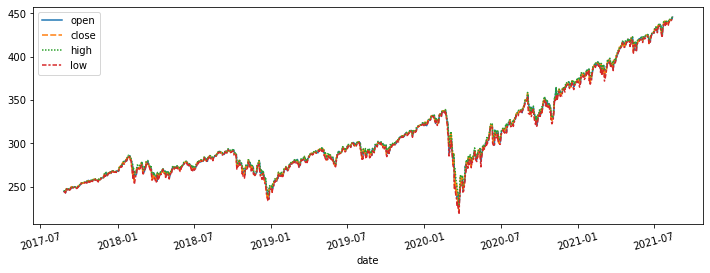

In [9]:
y = ['open', 'close', 'high', 'low']
plt.figure(figsize=(12, 4))
sns.lineplot(data=stock.hist[y])
plt.xticks(rotation=15)
plt.show()

## Multiple stocks

You can acquire at once information about multiple stocks. Note that the time interval will be the same for all of them.

`Server` caches stocks following a [Least Recently Used (LRU)](https://en.wikipedia.org/wiki/Cache_replacement_policies#Least_recently_used_(LRU)) policy.

In [10]:
start_t = time.perf_counter()
for stk in srv[['SPY', 'AAPL', 'MSFT', 'TSLA']]:
    print(stk)
stop_t = time.perf_counter()
print(f'Elapsed time: {stop_t - start_t:.4f}s')

Stock("SPY", conid=756733)
Stock("AAPL", conid=265598)
Stock("MSFT", conid=272093)
Stock("TSLA", conid=76792991)
Elapsed time: 1.8375s


again, since the data is cached, only the first time they are accessed there will be a significant delay.

In [11]:
%%timeit
srv[['SPY', 'AAPL', 'MSFT', 'TSLA']]

3.1 µs ± 61.9 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


we can also specify the period and bar for the multiple stocks,

In [12]:
period = '1y'
bar = '1d'
spy, aapl = srv[['SPY', 'AAPL'], period, bar]

print('SPY start and end dates:  ', spy.hist.index[0], ' -> ', spy.hist.index[-1])
print('AAPL start and end dates: ', aapl.hist.index[0], ' -> ', aapl.hist.index[-1])

SPY start and end dates:   2020-08-17 13:30:00  ->  2021-08-13 13:30:00
AAPL start and end dates:  2020-08-17 13:30:00  ->  2021-08-13 13:30:00
